<a href="https://colab.research.google.com/github/akadas112/AI_code/blob/main/Updated_Parkinson's_Disease_Prediction(1%262).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import numpy as np # linear algebra
 
import seaborn as sns #data visualisation 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Questionaries _dataset(1&2) - Sheet1.csv to Questionaries _dataset(1&2) - Sheet1.csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Questionaries _dataset(1&2) - Sheet1.csv']))

In [ ]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
PAT_NO,3000,3000,3000,3000,3000,3000,3000,3001,3001,3001
Event_ID,BL,V04,V06,V08,V10,V12,V15,BL,SC,V01
NP1SLPN,1,0,2,3,1,1,1,1,0,1
NP1SLPD,2,2,1,2,1,2,0,2,1,2
NP1PAIN,0,0,0,0,1,0,0,0,0,0
NP1URIN,0,1,0,1,1,3,1,4,4,3
NP1CNST,0,0,0,0,1,1,0,0,0,0
NP1LTHD,0,0,0,0,0,0,0,0,0,0
NP1FATG,0,1,0,0,1,1,0,1,1,1
Partition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.shape

(7146, 24)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


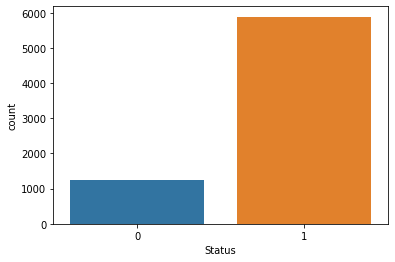

In [ ]:
sns.countplot(data['Status'])

In [ ]:
data['Status'].value_counts()

1    5887
0    1259
Name: Status, dtype: int64

**Filling Missing Values**

In [ ]:
data.isnull().sum()

PAT_NO          0
Event_ID        0
NP1SLPN         1
NP1SLPD         1
NP1PAIN         1
NP1URIN         1
NP1CNST         0
NP1LTHD         0
NP1FATG         0
Partition    7146
NP2SPCH         0
NP2SALV         0
NP2SWAL         0
NP2EAT          3
NP2DRES         3
NP2HYGN         3
NP2HWRT         3
NP2HOBB         5
NP2TURN         1
NP2TRMR         1
NP2RISE         1
NP2WALK         0
NP2FREZ         0
Status          0
dtype: int64

In [ ]:
data = data.fillna(data.mean())

**Preprocessing Data**

In [ ]:
X = data.drop(['PAT_NO','Event_ID', 'Partition', 'Status' ], axis=1)
y = data['Status'].values

In [ ]:
print(X)
print(y)

      NP1SLPN  NP1SLPD  NP1PAIN  NP1URIN  ...  NP2TRMR  NP2RISE  NP2WALK  NP2FREZ
0         1.0      2.0      0.0      0.0  ...      0.0      0.0        0        0
1         0.0      2.0      0.0      1.0  ...      0.0      0.0        0        0
2         2.0      1.0      0.0      0.0  ...      0.0      0.0        0        0
3         3.0      2.0      0.0      1.0  ...      0.0      0.0        0        0
4         1.0      1.0      1.0      1.0  ...      0.0      0.0        0        0
...       ...      ...      ...      ...  ...      ...      ...      ...      ...
7141      2.0      2.0      2.0      0.0  ...      1.0      1.0        0        0
7142      4.0      2.0      3.0      1.0  ...      1.0      1.0        1        1
7143      0.0      0.0      0.0      0.0  ...      0.0      0.0        0        0
7144      0.0      0.0      1.0      0.0  ...      0.0      0.0        0        0
7145      0.0      1.0      0.0      0.0  ...      0.0      0.0        0        0

[7146 rows x 20

In [ ]:
#from sklearn.ensemble import ExtraTreesClassifier
#import matplotlib.pyplot as plt
#model = ExtraTreesClassifier()
#model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
#feat_importances.nlargest(20).plot(kind='barh')
#plt.show()

In [ ]:
#get correlations of each features in dataset
#corrmat = data.corr()
#top_corr_features = corrmat.index
#plt.figure(figsize=(23,23))
#plot heat map
#g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**Scalling & Balancing the Data set**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
feature_X = StandardScaler().fit_transform(X)

In [ ]:
#pip install imblearn

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

Before OverSampling, counts of label '1': 5887
Before OverSampling, counts of label '0': 1259 



In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
#from imblearn.under_sampling import RandomUnderSampler
#sm = RandomUnderSampler(random_state = 2)
X_res, y_res = sm.fit_sample(feature_X, y.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (11774, 20)
After OverSampling, the shape of train_y: (11774,) 

After OverSampling, counts of label '1': 5887
After OverSampling, counts of label '0': 5887


**Split Data Set & Stratification**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0, shuffle = True)

In [ ]:
X_train.shape

(9419, 20)

In [ ]:
X_test.shape

(2355, 20)

In [ ]:
y_test

array([0, 0, 1, ..., 0, 1, 1])

**ANN**

In [ ]:
model = Sequential()
model.add(Dense(15,input_dim=20,activation='sigmoid'))
model.add(Dense(20,activation='sigmoid'))
#model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])



NameError: ignored

In [ ]:
import h5py
from tensorflow.keras.callbacks import ModelCheckpoint

mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min',  verbose=1, patience=100, baseline=0.4, save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test),batch_size=13,epochs=200, callbacks=mc)
model.summary()

Epoch 1/100
725/725 [==============================] - 6s 4ms/step - loss: 0.3986 - accuracy: 0.8487 - val_loss: 0.2343 - val_accuracy: 0.9244

Epoch 00001: val_loss improved from inf to 0.23431, saving model to best_model.h5
Epoch 2/100
725/725 [==============================] - 3s 4ms/step - loss: 0.1842 - accuracy: 0.9352 - val_loss: 0.1730 - val_accuracy: 0.9410

Epoch 00002: val_loss improved from 0.23431 to 0.17301, saving model to best_model.h5
Epoch 3/100
725/725 [==============================] - 3s 4ms/step - loss: 0.1584 - accuracy: 0.9419 - val_loss: 0.1675 - val_accuracy: 0.9435

Epoch 00003: val_loss improved from 0.17301 to 0.16748, saving model to best_model.h5
Epoch 4/100
725/725 [==============================] - 3s 4ms/step - loss: 0.1536 - accuracy: 0.9437 - val_loss: 0.1663 - val_accuracy: 0.9448

Epoch 00004: val_loss improved from 0.16748 to 0.16632, saving model to best_model.h5
Epoch 5/100
725/725 [==============================] - 3s 4ms/step - loss: 0.1517 - 

In [ ]:
model.evaluate(X_test,y_test)

74/74 [==============================] - 0s 2ms/step - loss: 0.1250 - accuracy: 0.9618


[0.12495102733373642, 0.9617834687232971]

In [ ]:
min(history.history['val_loss'])

0.12357944995164871

In [ ]:
from keras.models import load_model
saved_model = load_model('best_model.h5')

In [ ]:
y_pred = model.predict(X_test)
print("Predicted output:.....")
print(y_pred)

Predicted output:.....
[[0.01171937]
 [0.00704128]
 [0.9999801 ]
 ...
 [0.07220766]
 [0.99999523]
 [0.7135799 ]]


In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 0.05704633068823999
MSE: 0.03169444541874625
RMSE: 0.1780293386460396
VarScore: 0.8733298984860665


In [ ]:
for i in range(len(y_pred)):
  if(y_pred[i]>0.5):
    print('%.2f (expected %d)' % (1, y_test[i]))
 
  else:
        print('%.2f (expected %d)' % (0, y_test[i]))
 
 
_, accuracy = model.evaluate(X_train,y_train.ravel())
print('Training Accuracy: %.2f\n\n' % (accuracy*100))
  
_, accuracy = model.evaluate(X_test,y_test)
print('Testing Accuracy: %.2f\n\n' % (accuracy*100))

0.00 (expected 0)
0.00 (expected 0)
1.00 (expected 1)
0.00 (expected 0)
1.00 (expected 1)
0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
0.00 (expected 0)
1.00 (expected 1)
0.00 (expected 0)
1.00 (expected 1)
0.00 (expected 0)
0.00 (expected 0)
1.00 (expected 1)
1.00 (expected 1)
0.00 (expected 0)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
0.00 (expected 0)
1.00 (expected 1)
1.00 (expected 1)
0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
0.00 (expected 0)
1.00 (expected 1)
1.00 (expected 1)
1.00 (expected 1)
0.00 (expected 0)
1.00 (expected 1)
0.00 (expected 0)
1.00 (expected 1)
0.00 (expected 0)
1.00 (expected 1)
0.00 (expected 0)
0.00 (expected 0)
1.00 (expected 1)
1.00 (expected 1)
0.00 (expected 0)
1.00 (expected 1)
0.00 (expe

In [ ]:
score_ANN = round(accuracy_score(y_pred.round(),y_test)*100,2)
print("The accuracy score achieved using ANN is: "+str(score_ANN)+" %")

The accuracy score achieved using ANN is: 96.18 %


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred.round()))
print(classification_report(y_test, y_pred.round()))

[[1140   51]
 [  39 1125]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1191
           1       0.96      0.97      0.96      1164

    accuracy                           0.96      2355
   macro avg       0.96      0.96      0.96      2355
weighted avg       0.96      0.96      0.96      2355



**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1.fit(X_train, y_train.ravel())
predictions = lr1.predict(X_test)
  
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1191
           1       0.93      0.95      0.94      1164

    accuracy                           0.94      2355
   macro avg       0.94      0.94      0.94      2355
weighted avg       0.94      0.94      0.94      2355



In [ ]:
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.9439490445859873


In [ ]:
score_lr = round(accuracy_score(predictions,y_test)*100,2)

print("The accuracy score achieved using LR is: "+str(score_lr)+" %")

The accuracy score achieved using LR is: 94.39 %


In [ ]:
import pickle
# save the model to disk
filename = 'finalized_model_lr.sav'
pickle.dump(lr1, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9439490445859873


**K-Nearest Neighbour**


In [ ]:
# Fitting KNN to the Training set 
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors = 1, weights = 'uniform',algorithm = 'brute',metric = 'manhattan')
knn1.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
y_pred_knn = knn1.predict(X_test)

In [ ]:
# Predictions and Evaluations 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[1179   12]
 [  56 1108]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1191
           1       0.99      0.95      0.97      1164

    accuracy                           0.97      2355
   macro avg       0.97      0.97      0.97      2355
weighted avg       0.97      0.97      0.97      2355



In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Accuracy: 0.9711252653927813


In [ ]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 97.11 %


In [ ]:
#Hyperparameter tuning for KNN
from sklearn.model_selection import GridSearchCV
grid_params = { 'n_neighbors' : range(1, 21, 2),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=4, n_jobs = -1)
g_res = gs.fit(X_train, y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.3min finished


In [ ]:
g_res.best_score_

0.9644334439099008

In [ ]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

In [ ]:
import pickle
# save the model to disk
filename1 = 'finalized_model_knn.sav'
pickle.dump(knn1, open(filename1, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename1, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9711252653927813


**SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm1 = SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svm1.fit(X_train, y_train.ravel())


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_svm = svm1.predict(X_test)
# Predictions and Evaluations 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

[[1158   33]
 [  37 1127]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1191
           1       0.97      0.97      0.97      1164

    accuracy                           0.97      2355
   macro avg       0.97      0.97      0.97      2355
weighted avg       0.97      0.97      0.97      2355

Accuracy: 0.970276008492569


In [ ]:
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using SVM is: "+str(score_svm)+" %")

The accuracy score achieved using SVM is: 97.03 %


In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'sigmoid', 'linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.865, total=   4.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.874, total=   3.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.896, total=   3.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.881, total=   3.7s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.886, total=   3.8s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.579, total=   4.3s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.583, total=   4.5s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.577, total=   4.3s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.571, total=   4.8s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed: 45.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'sigmoid', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
filename2 = 'finalized_model_svm.sav'
pickle.dump(svm1, open(filename2, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename2, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.970276008492569


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
dt1.fit(X_train, y_train.ravel())
y_pred_dt = dt1.predict(X_test)

In [ ]:
# Predictions and Evaluations 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

[[1140   51]
 [  42 1122]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1191
           1       0.96      0.96      0.96      1164

    accuracy                           0.96      2355
   macro avg       0.96      0.96      0.96      2355
weighted avg       0.96      0.96      0.96      2355

Accuracy: 0.9605095541401274


In [ ]:
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using DT is: "+str(score_dt)+" %")

The accuracy score achieved using DT is: 96.05 %


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

grid_search.fit(X_train, y_train)



Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.0s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                       

In [ ]:
# print best parameter after tuning
print(grid_search.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_search.best_estimator_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')


In [ ]:
# save the model to disk
filename3 = 'finalized_model_dt.sav'
pickle.dump(dt1, open(filename3, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename3, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9605095541401274


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
rf1.fit(X_train, y_train.ravel())
y_pred_rf = rf1.predict(X_test)

In [ ]:
# Predictions and Evaluations 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

[[1146   45]
 [  28 1136]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1191
           1       0.96      0.98      0.97      1164

    accuracy                           0.97      2355
   macro avg       0.97      0.97      0.97      2355
weighted avg       0.97      0.97      0.97      2355

Accuracy: 0.9690021231422505


In [ ]:
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using RF is: "+str(score_rf)+" %")

The accuracy score achieved using RF is: 96.9 %


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(RandomForestClassifier(n_jobs=-1), param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random

In [ ]:
# print best parameter after tuning
print(grid_search_forest.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_search_forest.best_estimator_)

{'bootstrap': False, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


In [ ]:
# save the model to disk
filename4 = 'finalized_model_rf.sav'
pickle.dump(rf1, open(filename4, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename4, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9690021231422505


**Comparison**

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


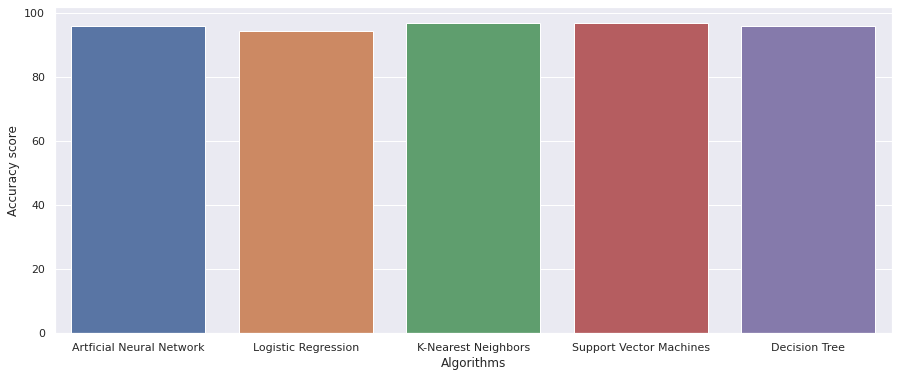

In [ ]:
#scores = [score_knn,score_svm,score_ANN]
#algorithms = ["K-Nearest Neighbors","Support Vector Machines","ANN","ImpactLearning"] 
scores = [score_ANN,score_lr,score_knn,score_svm,score_dt]
algorithms = ["Artficial Neural Network","Logistic Regression","K-Nearest Neighbors","Support Vector Machines","Decision Tree"]
sns.set(rc={'figure.figsize':(15,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)